<a href="https://colab.research.google.com/github/MaximeCornaton/CPE_IA-DeepLearning/blob/master/DEPOs_TP1_TP2/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scikit-learn matplotlib
!pip install tensorflow


^C


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


# TP2

## Exercice 2.1

### Couche simple

In [ ]:
import numpy as np

class Perceptron:

    def __init__(self, num_inputs, activation_function, learning_rate, num_epochs):
        self.__num_inputs = num_inputs
        # Créer un tableau de longueur num_inputs contenant les poids (entre 0 et 1) associés aux entrées
        self.__weights = np.random.rand(num_inputs)
        # Choix d'un biais random (entre 0 et 1)
        self.__bias = np.random.rand()
        self.__activation_function = activation_function
        self.__learning_rate = learning_rate
        self.__num_epochs = num_epochs

    def train(self, X, y):
        for epoch in range(self.__num_epochs):
            for i in range(len(X)):
                input_data = X[i]
                prediction = self.predict(input_data)
                error = y[i] - prediction
                self.__weights += self.__learning_rate * error * input_data
                self.__bias += self.__learning_rate * error
        
    def predict(self, X):
        linear_combination = self.__bias
        for i in range(len(X)):
            linear_combination += X[i] * self.__weights[i]
        return self.activate(linear_combination)

    def activate(self, x):
        if self.__activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.__activation_function == 'tanh':
            return np.tanh(x)
        elif self.__activation_function == 'relu':
            return np.maximum(0, x)
        elif self.__activation_function == 'gaussian':
            return np.exp(-x ** 2)
        else:
            # Renvoyer la fonction d'activation identité par défaut
            return x




if __name__ == "__main__":
    # Exemple de test avec une fonction SIGMOID
    # L'objectif est de démontrer la capacité du perceptron à apprendre la logique OR
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 1])

    perceptron = Perceptron(num_inputs=2, activation_function='sigmoid', learning_rate=0.5, num_epochs=1000)
    perceptron.train(X, y)

    # Test des prédictions
    test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    for data in test_data:
        prediction = perceptron.predict(data)
        print(f"Prévision pour {data}: {prediction}")

Prévision pour [0 0]: 0.010114057576340141
Prévision pour [0 1]: 0.9959831278740803
Prévision pour [1 0]: 0.9959675063637465
Prévision pour [1 1]: 0.9999998331582493


### Plusieurs couches

In [ ]:
import numpy as np

class MultiLayerPerceptron:
    def __init__(self, num_inputs, num_hidden, num_outputs, activation='sigmoid', epochs=1000, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.activation = activation
        
        # Initialisation des poids pour les couches cachées et de sortie
        self.hidden_weights = np.random.rand(self.num_inputs, self.num_hidden)
        self.output_weights = np.random.rand(self.num_hidden, self.num_outputs)

        # Choix de la fonction d'activation
        if activation == 'sigmoid':
            self.activation_function = self._sigmoid
            self.activation_derivative = self._sigmoid_derivative
        elif activation == 'tanh':
            self.activation_function = np.tanh
            self.activation_derivative = lambda x: 1 - np.tanh(x)**2
        elif activation == 'relu':
            self.activation_function = self._relu
            self.activation_derivative = self._relu_derivative
        else:
            raise ValueError("Fonction d'activation non prise en charge")

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def _relu(self, x):
        return np.maximum(0, x)

    def _relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward propagation
            hidden_layer_input = np.dot(X, self.hidden_weights)
            hidden_layer_output = self.activation_function(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.output_weights)
            output_layer_output = self.activation_function(output_layer_input)

            # Calcul de l'erreur
            output_error = y - output_layer_output
            
            # Calcul du gradient pour la couche de sortie
            output_delta = output_error * self.activation_derivative(output_layer_output)

            # Calcul de l'erreur pour la couche cachée
            hidden_error = output_delta.dot(self.output_weights.T)
            
            # Calcul du gradient pour la couche cachée
            hidden_delta = hidden_error * self.activation_derivative(hidden_layer_output)

            # Mise à jour des poids
            self.output_weights += hidden_layer_output.T.dot(output_delta) * self.learning_rate
            self.hidden_weights += X.T.dot(hidden_delta) * self.learning_rate

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.hidden_weights)
        hidden_layer_output = self.activation_function(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.output_weights)
        output_layer_output = self.activation_function(output_layer_input)

        return output_layer_output

# Exemple d'utilisation avec une fonction XOR
if __name__ == "__main__":
    # Données d'entrée et de sortie pour la fonction XOR
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Création et entraînement du modèle
    model = MultiLayerPerceptron(num_inputs=2, num_hidden=4, num_outputs=1, activation='sigmoid', epochs=10000, learning_rate=0.1)
    model.train(X, y)

    # Prédictions
    predictions = model.predict(X)
    print("Prédictions finales:")
    for i in range(len(predictions)):
        print(f"Données d'entrée: {X[i]}, Prédiction: {predictions[i]}")


Prédictions finales:
Données d'entrée: [0 0], Prédiction: [0.11073436]
Données d'entrée: [0 1], Prédiction: [0.90991055]
Données d'entrée: [1 0], Prédiction: [0.91726987]
Données d'entrée: [1 1], Prédiction: [0.07019086]


## Exercice 2.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

# Charger les données MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
# Normaliser les données
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

# Charger les données IMDB
max_features = 10000  # Nombre maximum de mots à conserver comme fonction de fréquence
maxlen = 200  # Longueur maximale des avis
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words=max_features)
x_train_imdb = sequence.pad_sequences(x_train_imdb, maxlen=maxlen)
x_test_imdb = sequence.pad_sequences(x_test_imdb, maxlen=maxlen)

# Modifier les hyperparamètres
# Exemple : nombre de neurones dans la couche cachée, taux d'apprentissage, nombre d'époques, etc.
num_neurons = 128
learning_rate = 0.001
epochs = 10

# Modèle pour MNIST
model_mnist = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(num_neurons, activation='relu'),
    Dense(10, activation='softmax')
])

model_mnist.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_mnist.fit(x_train_mnist, y_train_mnist, epochs=epochs, validation_data=(x_test_mnist, y_test_mnist))

# Modèle pour IMDB
model_imdb = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Flatten(),
    Dense(num_neurons, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_imdb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_imdb.fit(x_train_imdb, y_train_imdb, epochs=epochs, validation_data=(x_test_imdb, y_test_imdb))


Epoch 1/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2554 - accuracy: 0.9271 - val_loss: 0.1404 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.0941 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0760 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0772 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0740 - val

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3827 - accuracy: 0.8166 - val_loss: 0.3073 - val_accuracy: 0.8684
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.0645 - accuracy: 0.9788 - val_loss: 0.5434 - val_accuracy: 0.8335
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.6652 - val_accuracy: 0.8483
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.8304 - val_accuracy: 0.8418
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0256 - accuracy: 0.9907 - val_loss: 0.7520 - val_accuracy: 0.8414
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.9118 - val_accuracy: 0.8324
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.0973 - val_accuracy: 0.8402

In [ ]:
# Évaluation du modèle MNIST
mnist_loss, mnist_accuracy = model_mnist.evaluate(x_test_mnist, y_test_mnist)
print("MNIST Accuracy:", mnist_accuracy)

# Prédictions pour MNIST
mnist_predictions = np.argmax(model_mnist.predict(x_test_mnist), axis=-1)   

# Évaluation du modèle IMDB
imdb_loss, imdb_accuracy = model_imdb.evaluate(x_test_imdb, y_test_imdb)
print("IMDB Accuracy:", imdb_accuracy)

# Prédictions pour IMDB
imdb_predictions = (model_imdb.predict(x_test_imdb) > 0.5).astype("int32")

# Calcul des métriques pour les deux modèles
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report for MNIST:")
print(classification_report(y_test_mnist, mnist_predictions))

print("\nConfusion Matrix for MNIST:")
print(confusion_matrix(y_test_mnist, mnist_predictions))

print("\nClassification Report for IMDB:")
print(classification_report(y_test_imdb, imdb_predictions))

print("\nConfusion Matrix for IMDB:")
print(confusion_matrix(y_test_imdb, imdb_predictions))


313/313 [==============================] - 0s 423us/step - loss: 0.0752 - accuracy: 0.9796
MNIST Accuracy: 0.9796000123023987
782/782 [==============================] - 1s 1ms/step - loss: 1.1697 - accuracy: 0.8390
IMDB Accuracy: 0.8389599919319153
782/782 [==============================] - 1s 1ms/step

Classification Report for MNIST:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg

## Exercice 2.3




Epoch 1/100

94/94 - 2s - loss: 0.0409 - 2s/epoch - 20ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0187 - 99ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0141 - 102ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0128 - 103ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0117 - 100ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0104 - 99ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0094 - 100ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0084 - 100ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0076 - 101ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0067 - 91ms/epoch - 968us/step
Epoch 11/100
94/94 - 0s - loss: 0.0059 - 99ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0052 - 112ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0046 - 107ms/epoch - 1ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0040 - 108ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0036 - 96ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0032 - 98ms/epoc

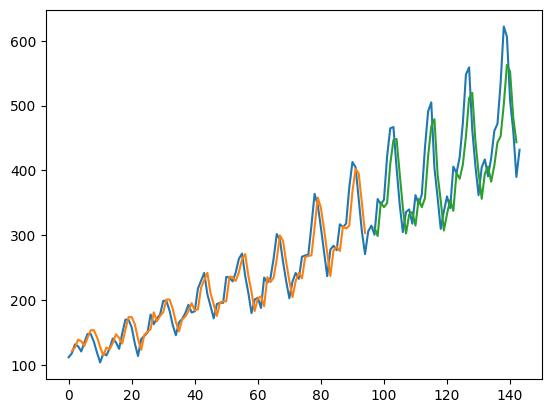

In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Le code utilise la fonction `create_dataset` pour générer des séquences qui servent à l'apprentissage du modèle LSTM. Cette fonction segmente la série temporelle en paires entrée/sortie pour l'entraînement. L'intervalle de temps, défini par la fenêtre `look_back`, permet de créer ces séquences. Le modèle LSTM est conçu pour anticiper la valeur suivante de la série, s'appuyant sur les données séquentielles fournies.